In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
# surat data
df = pd.read_csv('./../data/tomato.csv')
# pune data
df_pune = pd.read_csv('./../pune_data/pune_tomato.csv')

In [2]:
df.columns

Index(['Unnamed: 0', 'DISTRICT', 'MARKET', 'COMMODITY', 'VARIETY', 'GRADE',
       'MIN', 'MAX', 'MODAL', 'DATE'],
      dtype='object')

In [3]:
df_pune.columns

Index(['Unnamed: 0', 'DISTRICT', 'MARKET', 'COMMODITY', 'VARIETY', 'GRADE',
       'MIN', 'MAX', 'MODAL', 'DATE'],
      dtype='object')

In [4]:
df = df.drop(['Unnamed: 0', 'DISTRICT', 'MARKET', 'COMMODITY', 'VARIETY', 'GRADE',
       'MIN', 'MAX'], axis= 1)
df_pune = df_pune.drop(['Unnamed: 0', 'DISTRICT', 'MARKET', 'COMMODITY', 'VARIETY', 'GRADE',
       'MIN', 'MAX'], axis= 1)

In [5]:
df['DATE'] = df['DATE'].apply(lambda x: datetime.strptime(x, "%d %b %Y"))
df = df.set_index("DATE")
df_pune['DATE'] = df_pune['DATE'].apply(lambda x: datetime.strptime(x, "%d %b %Y"))
df_pune = df_pune.set_index("DATE")

In [6]:
df['MODAL'] = df['MODAL'].apply(lambda x: int(x))
df_pune['MODAL'] = df_pune['MODAL'].apply(lambda x: int(x))

In [7]:
#interpolate
Interpolated_df = df.resample('1D').interpolate(mehod= "linear")
df_pune = df_pune[~df_pune.index.duplicated()]
Interpolated_df_pune = df_pune.resample('1D').interpolate(mehod= "linear")

# Yearwise Vegetable price in surat(per 100kg)

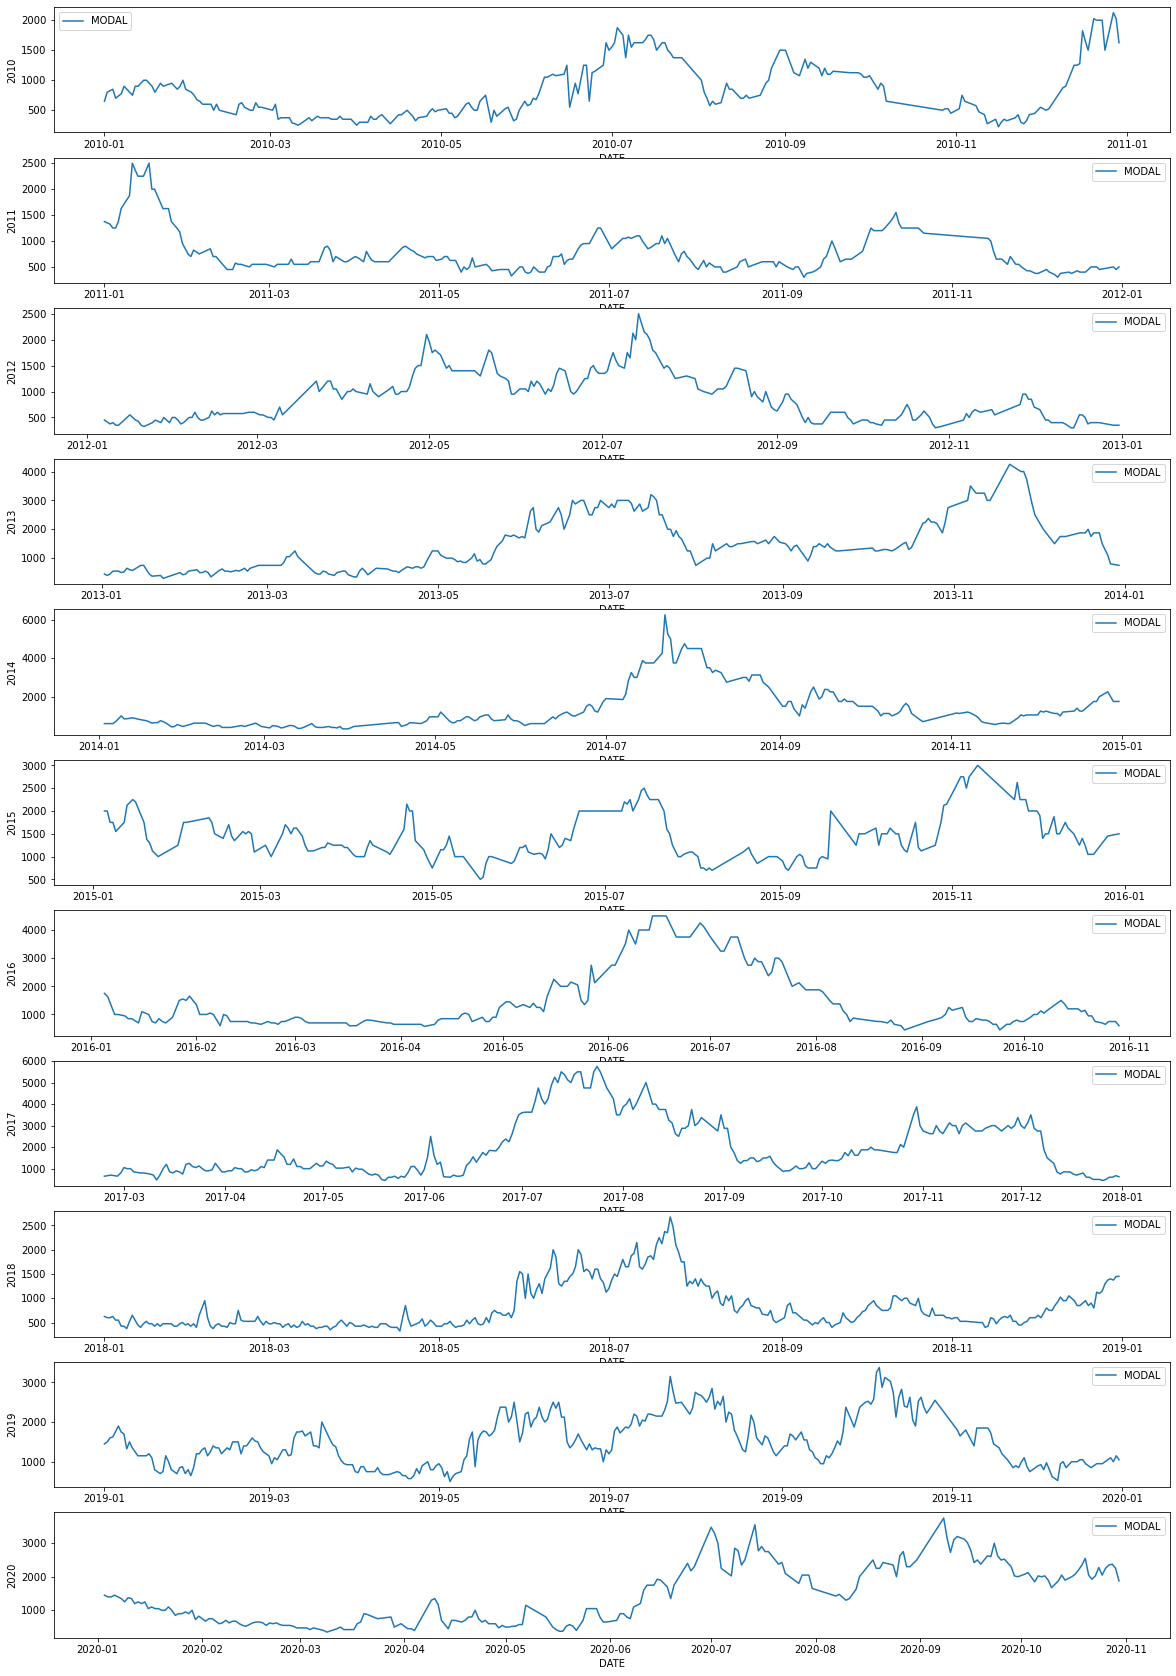

In [8]:
#Yearwise Vegetable price in surat(per 100kg)  
groups = df.groupby(pd.Grouper(freq='A'))
# years = pd.DataFrame()
years= {}
for name, group in groups:
    years[name.year] = group
fig, axes = plt.subplots(len(years),1, figsize=(20,30))
i = 0
for year in years:
    sns.lineplot(data= years[year], ax= axes[i])
    axes[i].set_ylabel(year)
    i += 1

# Yearwise Vegetable price in pune(per 100kg)

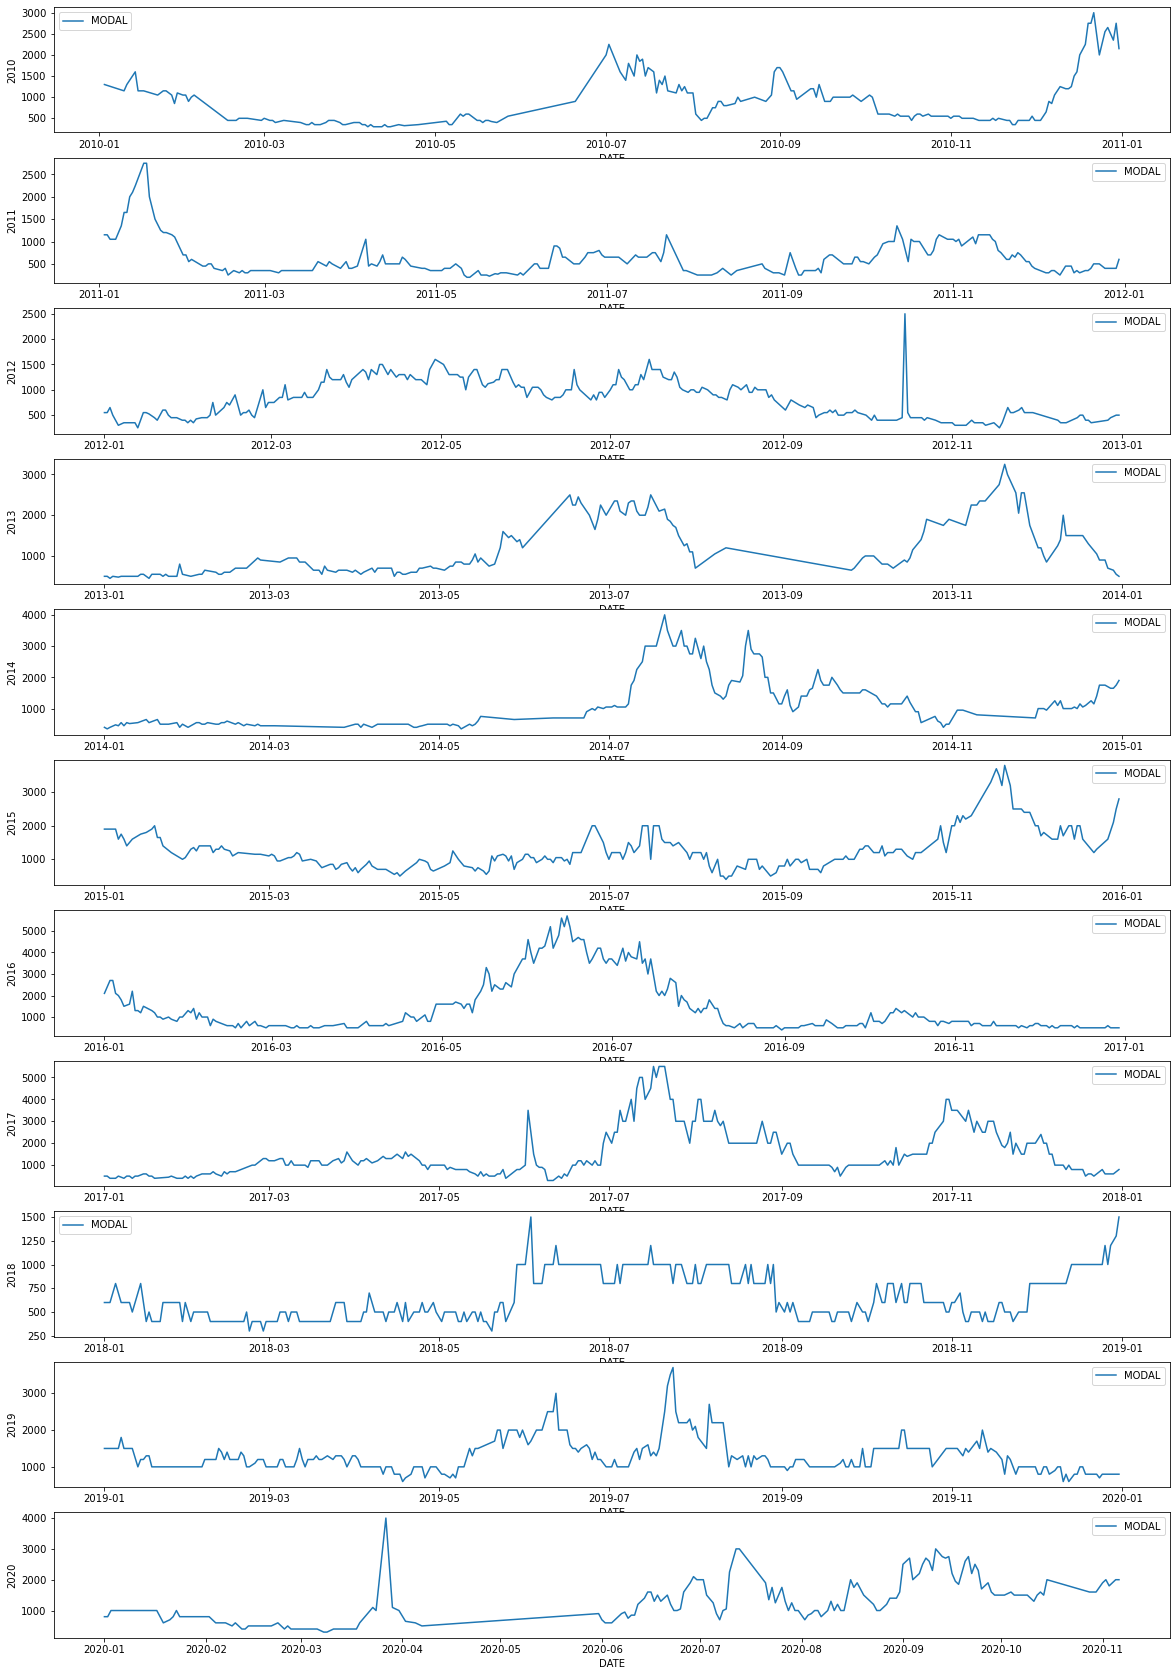

In [9]:
#Yearwise Vegetable price in pune(per 100kg)  
groups = df_pune.groupby(pd.Grouper(freq='A'))
# years = pd.DataFrame()
years= {}
for name, group in groups:
    years[name.year] = group
fig, axes = plt.subplots(len(years),1, figsize=(20,30))
i = 0
for year in years:
    sns.lineplot(data= years[year], ax= axes[i])
    axes[i].set_ylabel(year)
    i += 1

Trends of vegetable price in both Surat and Pune are same

# Vegetable price in surat(per 100kg) in 2010-20

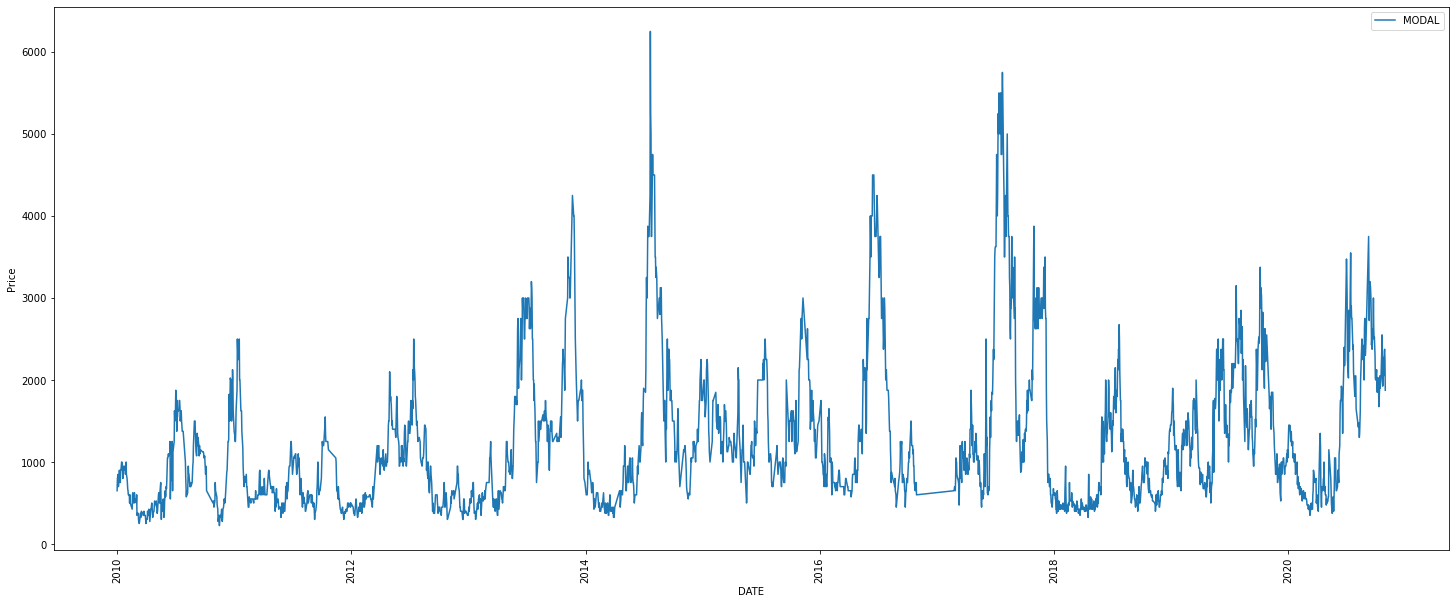

In [10]:
#2010-20 Vegetable price in surat(per 100kg)
fig, ax = plt.subplots(figsize= (25,10))
sns.lineplot(data= df, ax= ax)
ax.set_ylabel('Price')
plt.xticks(rotation=90)
plt.show()

# Vegetable price in surat(per 100kg) in 2010-20

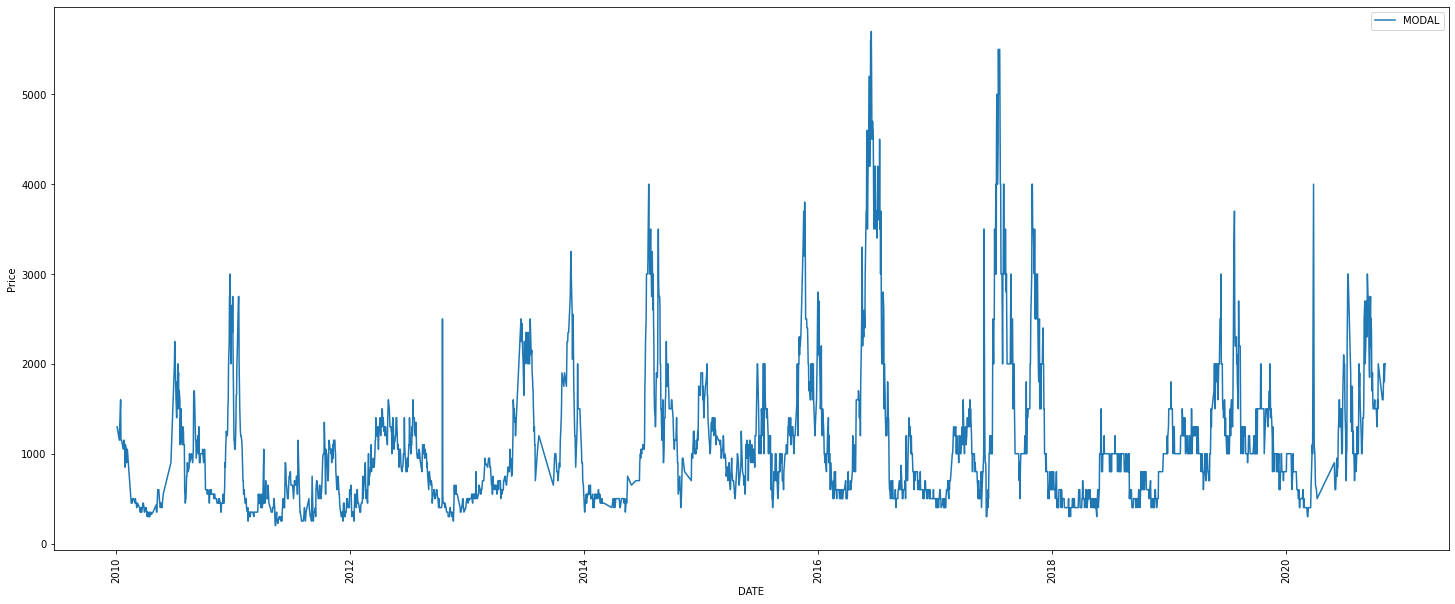

In [11]:
#2010-20 Vegetable price in surat(per 100kg)
fig, ax = plt.subplots(figsize= (25,10))
sns.lineplot(data= df_pune, ax= ax)
ax.set_ylabel('Price')
plt.xticks(rotation=90)
plt.show()

# Vegetable price in surat, Resampled on monthly basis

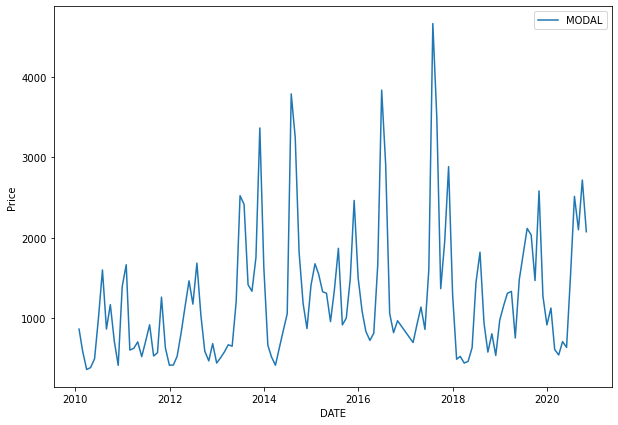

In [12]:
#Veg price in surat, Resampled on monthly basis
month_sampled = df.resample('1M')
month_sampled = month_sampled.mean()
fig, ax = plt.subplots(figsize=(10,7))
sns.lineplot(data = month_sampled, ax= ax)
ax.set_ylabel('Price')
plt.show()

Towards the end of odd-numbered year, we find a notable rise, signifying the seasonality.

# Vegetable price in surat, Resampled on yearly basis

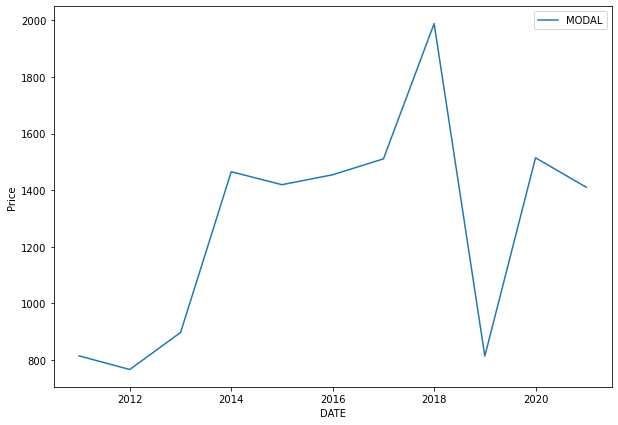

In [13]:
#Veg price in surat, Resampled on yearly basis
year_sampled = df.resample('1Y')
year_sampled = year_sampled.mean()
fig, ax = plt.subplots(figsize=(10,7))
sns.lineplot(data = year_sampled, ax= ax)
ax.set_ylabel('Price')
plt.show()

Depicts the deviation of the mean prices across the years

# Moving Average over 130 and 365 Days

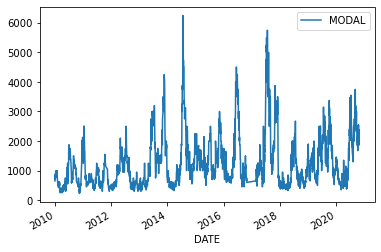

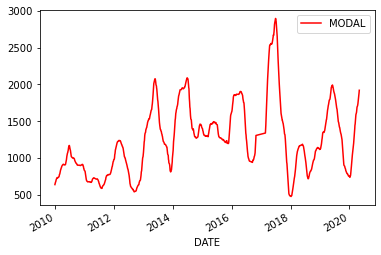

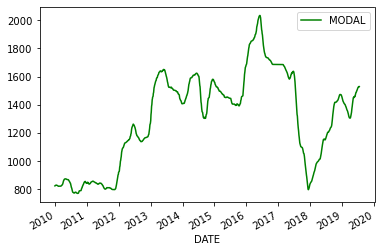

In [14]:
# Moving Average over 130 and 365 Days
half_year_rolling_df = df.rolling(window= 130)
half_year_rolling_mean_df = half_year_rolling_df.mean()
df.plot()
half_year_rolling_mean_df.plot(color= 'red')
full_year_rolling_df = df.rolling(window= 365)
full_year_rolling_mean_df = full_year_rolling_df.mean()
full_year_rolling_mean_df.plot(color= 'green')
plt.show()

# Histogram over Vegetable Price

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5c37f1940>]],
      dtype=object)

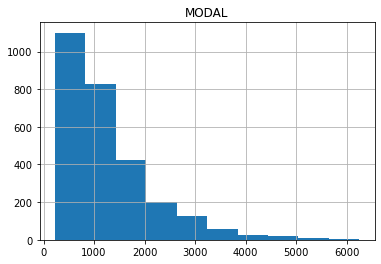

In [15]:
import math
df.hist()

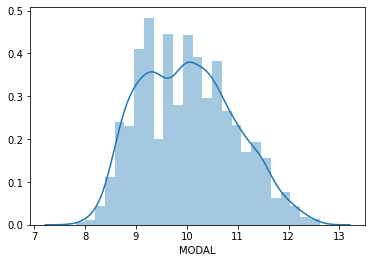

In [16]:
sns.distplot( df['MODAL'].apply(lambda x: math.log2(x)))

# Box Plots

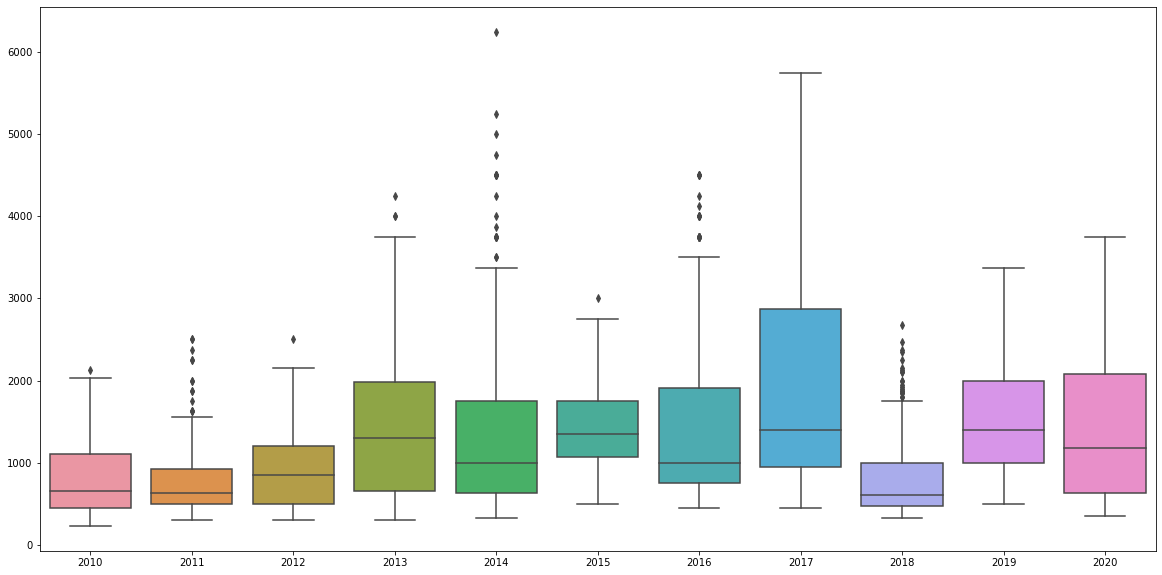

In [17]:
groups = df.groupby(pd.Grouper(freq='A'))
# years = pd.DataFrame()
years= {}
for name, group in groups:
    years[name.year] = group
fig, axes = plt.subplots(figsize=(20,10))
i = 0
labels = [i for i in range(2010,2021)]
sns.boxplot(data=list(years.values()), ax= axes)
axes.set_xticklabels(labels)
plt.show()

The range of prices over the years and outlier effect.

# Correlation Between weather and Vegetable price 

In [18]:
df1 = pd.read_csv('./../data/weather.csv')

In [19]:
df1.columns

Index(['date', 'sunHour', 'uvIndex', 'tempC', 'windspeedKmph', 'winddirDegree',
       'winddir16Point', 'precipMM', 'humidity', 'visibility', 'pressure',
       'cloudcover', 'HeatIndexC', 'DewPointC', 'WindChillC', 'WindGustKmph'],
      dtype='object')

In [20]:
df1 = df1.drop(['sunHour', 'uvIndex', 'windspeedKmph', 'winddirDegree', 'winddir16Point',
       'visibility', 'pressure', 'HeatIndexC', 'DewPointC', 'WindChillC', 'WindGustKmph'], axis= 1)

In [21]:
df1['date'] = df1['date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

In [22]:
Interpolated_df=Interpolated_df.reset_index()

In [23]:
dict = {'date': [],
        'tempC': [],
        'precipMM': [],
        'humidity': [],
        'cloudcover': [],
        'MODAL': [],
       } 
df3 = pd.DataFrame(dict) 

In [24]:
df = df[~df.index.duplicated()]
for x in range(3896):
    if Interpolated_df['DATE'][x] == df1['date'][x]:
        df3.loc[x] = [Interpolated_df['DATE'][x], df1['tempC'][x], df1['precipMM'][x], df1['humidity'][x], df1['cloudcover'][x], Interpolated_df['MODAL'][x]] 

In [25]:
df3['MODAL'] = df3['MODAL'].apply(lambda x: x/100)

# Comparision Between Price, Temperature, Humidity, Cloudcover and Precipitation

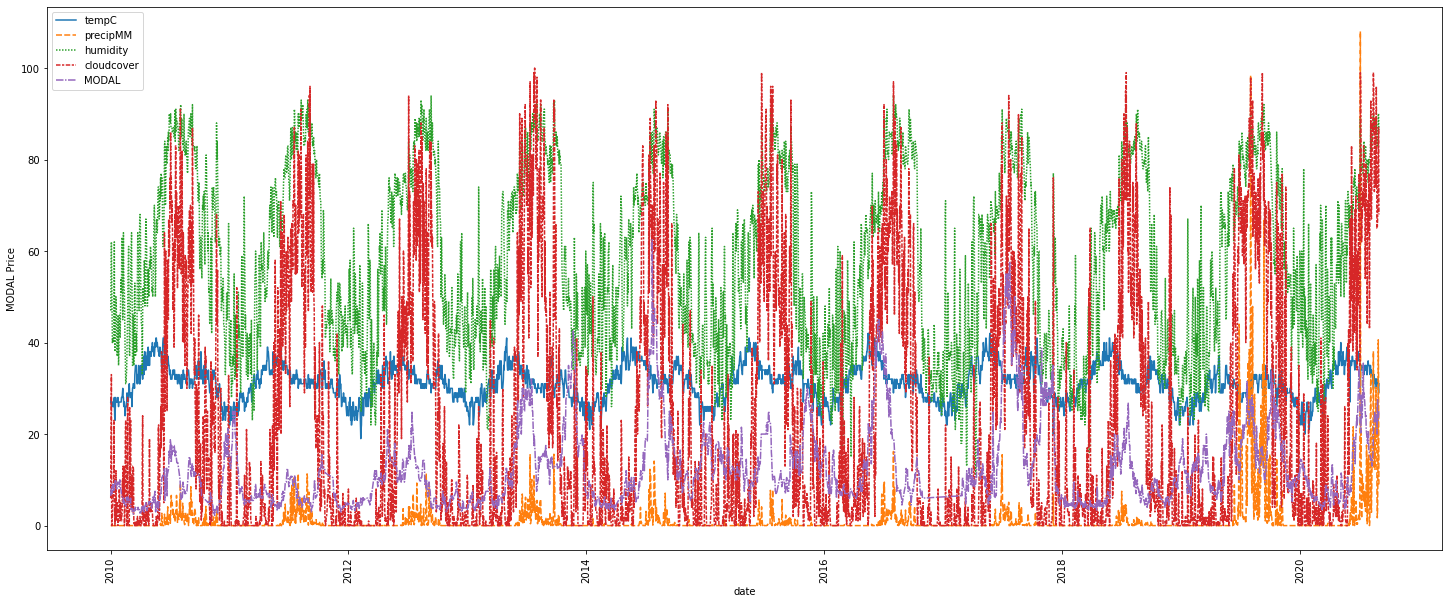

In [26]:
df3 = df3.set_index("date")
import seaborn as sns
fig, ax = plt.subplots(figsize= (25,10))
sns.lineplot(data= df3, ax= ax)
ax.set_ylabel('MODAL Price')
plt.xticks(rotation=90)
plt.show()

 # Comparision Between Price & Precipitation

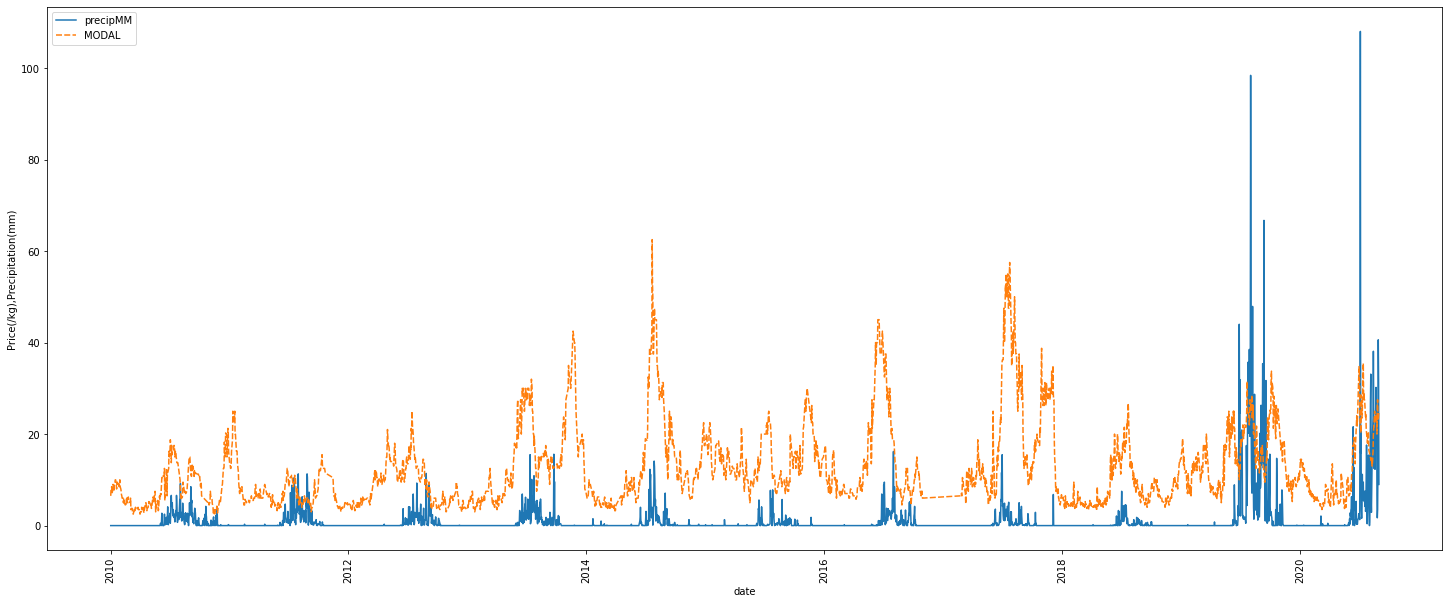

In [27]:
#df3 = df3.set_index("date")
df4 = df3.drop(['tempC', 'humidity', 'cloudcover'], axis= 1)
import seaborn as sns
fig, ax = plt.subplots(figsize= (25,10))
sns.lineplot(data= df4, ax= ax)
ax.set_ylabel('Price(/kg),Precipitation(mm)')
plt.xticks(rotation=90)
plt.show()

 # Comparision Between Price & Temperature

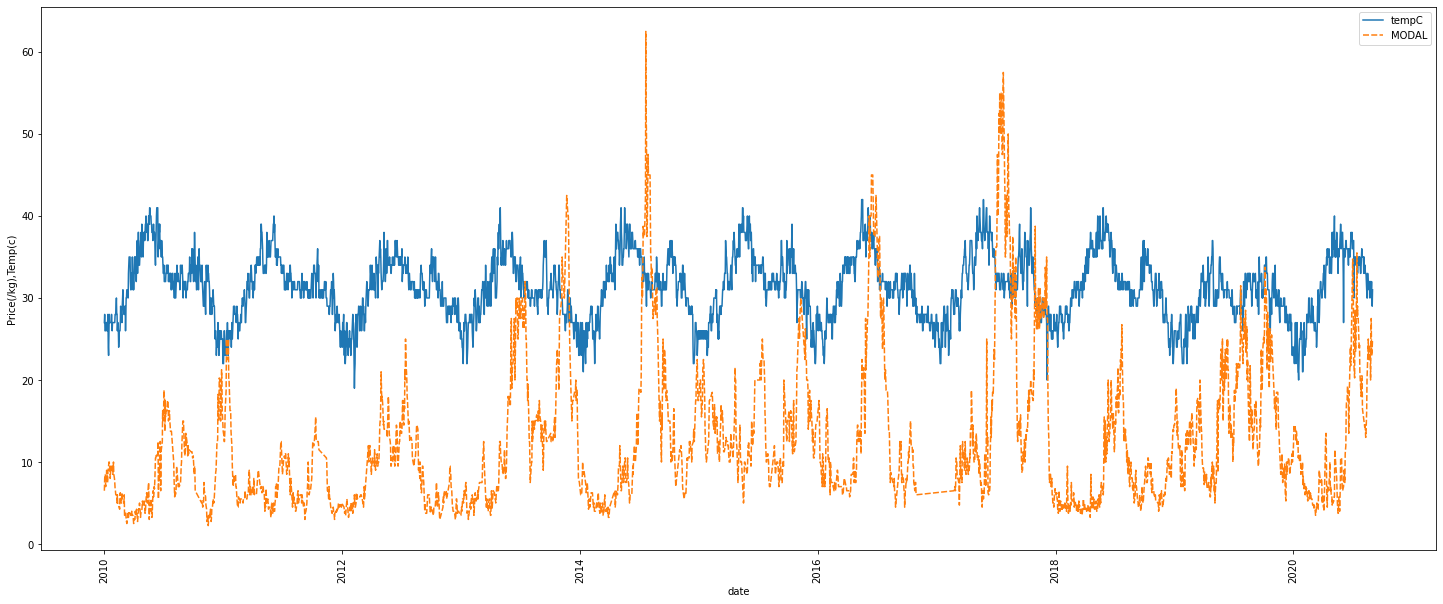

In [28]:
df5 = df3.drop(['precipMM', 'humidity', 'cloudcover'], axis= 1)
import seaborn as sns
fig, ax = plt.subplots(figsize= (25,10))
sns.lineplot(data= df5, ax= ax)
ax.set_ylabel('Price(/kg),Temp(c)')
plt.xticks(rotation=90)
plt.show()

 # Comparision Between Price & Humidity

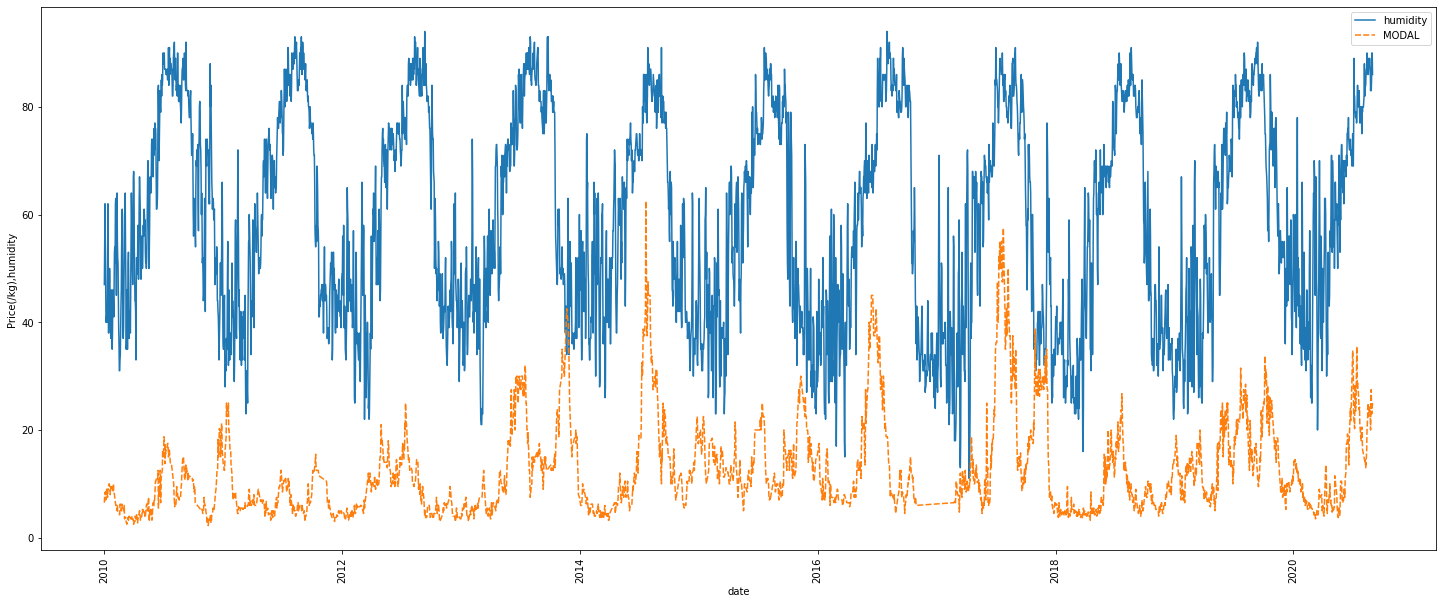

In [29]:
df6 = df3.drop(['precipMM', 'tempC', 'cloudcover'], axis= 1)
import seaborn as sns
fig, ax = plt.subplots(figsize= (25,10))
sns.lineplot(data= df6, ax= ax)
ax.set_ylabel('Price(/kg),humidity')
plt.xticks(rotation=90)
plt.show()

 # Comparision Between Price & CloudCover

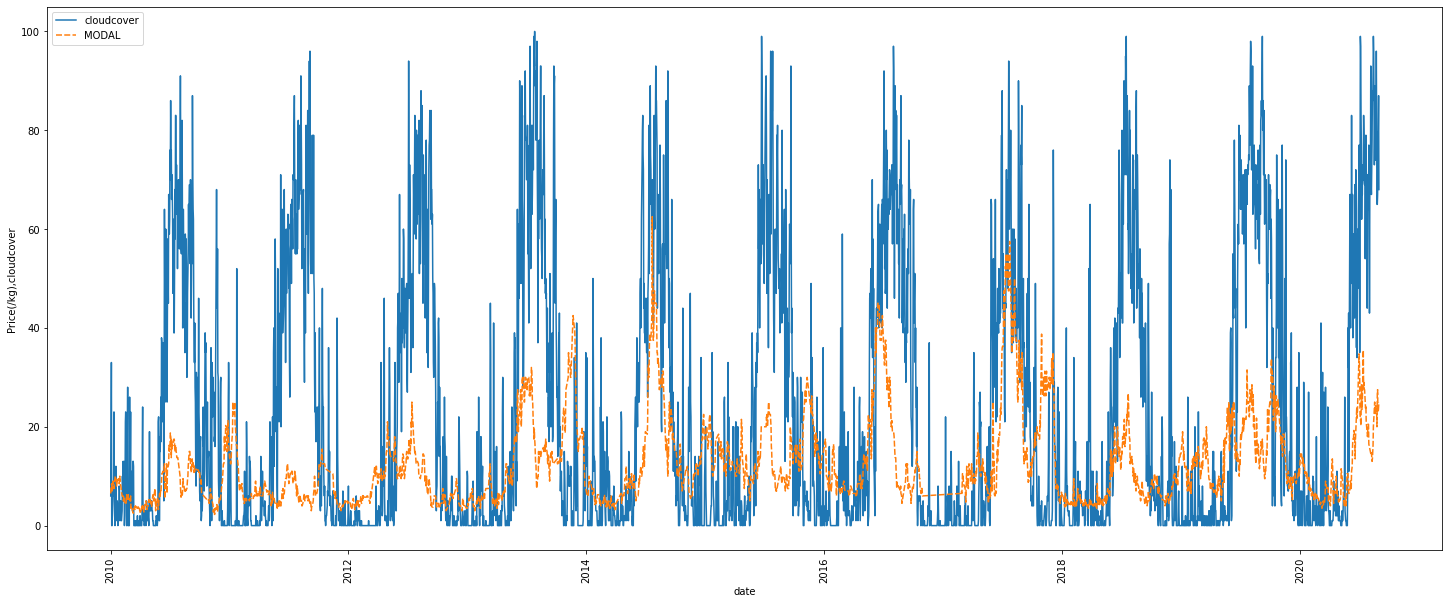

In [30]:
df7 = df3.drop(['precipMM', 'tempC', 'humidity'], axis= 1)
import seaborn as sns
fig, ax = plt.subplots(figsize= (25,10))
sns.lineplot(data= df7, ax= ax)
ax.set_ylabel('Price(/kg),cloudcover')
plt.xticks(rotation=90)
plt.show()

# Spearman’s correlation coefficient & p Value

In [31]:
#spearman
from scipy.stats import spearmanr
coef, p = spearmanr(df3['MODAL'], df3['tempC'])
print('Spearmans correlation coefficient of Modal price(perkg) and tempC: %.7f' % coef)
print('p Value =%.7f'%p)
coef, p = spearmanr(df3['MODAL'], df3['precipMM'])
print('Spearmans correlation coefficient of Modal price(perkg) and precipMM: %.7f' % coef)
print('p Value =%.7f'%p)
coef, p = spearmanr(df3['MODAL'], df3['humidity'])
print('Spearmans correlation coefficient of Modal price(perkg) and humidity: %.7f' % coef)
print('p Value =%.7f'%p)
coef, p = spearmanr(df3['MODAL'], df3['cloudcover'])
print('Spearmans correlation coefficient of Modal price(perkg) and cloudcover: %.7f' % coef)
print('p Value =%.7f'%p)


Spearmans correlation coefficient of Modal price(perkg) and tempC: 0.1310039
p Value =0.0000000
Spearmans correlation coefficient of Modal price(perkg) and precipMM: 0.3642739
p Value =0.0000000
Spearmans correlation coefficient of Modal price(perkg) and humidity: 0.3301887
p Value =0.0000000
Spearmans correlation coefficient of Modal price(perkg) and cloudcover: 0.3760231
p Value =0.0000000
